In [1]:
import urllib2

In [2]:
response = urllib2.urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/00244/fertility_Diagnosis.txt')
html = response.read()
type(html)
html[:50]

'-0.33,0.69,0,1,1,0,0.8,0,0.88,N\r\n-0.33,0.94,1,0,1,'

In [4]:
lines = html.split('\r\n')
lines[:5]

['-0.33,0.69,0,1,1,0,0.8,0,0.88,N',
 '-0.33,0.94,1,0,1,0,0.8,1,0.31,O',
 '-0.33,0.5,1,0,0,0,1,-1,0.5,N',
 '-0.33,0.75,0,1,1,0,1,-1,0.38,N',
 '-0.33,0.67,1,1,0,0,0.8,-1,0.5,O']

In [5]:
data = [l.split(',') for l in lines]
data[:5]

[['-0.33', '0.69', '0', '1', '1', '0', '0.8', '0', '0.88', 'N'],
 ['-0.33', '0.94', '1', '0', '1', '0', '0.8', '1', '0.31', 'O'],
 ['-0.33', '0.5', '1', '0', '0', '0', '1', '-1', '0.5', 'N'],
 ['-0.33', '0.75', '0', '1', '1', '0', '1', '-1', '0.38', 'N'],
 ['-0.33', '0.67', '1', '1', '0', '0', '0.8', '-1', '0.5', 'O']]

In [6]:
import pandas as pd
cols = ['season', 'age', 'disease' ,'trauma', 'surgery', 'fever', 'alcohol', 'smoking', 'sitting', 'status']
fertility_df = pd.DataFrame(data, columns = cols)
fertility_df.head()

,season,age,disease,trauma,surgery,fever,alcohol,smoking,sitting,status
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.5,1,0,0,0,1,-1,0.5,N
3,-0.33,0.75,0,1,1,0,1,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.5,O


In [13]:
numeric_cols = [c for c in cols if c!='status']
fertility_df[numeric_cols] = fertility_df[numeric_cols].apply(pd.to_numeric)
fertility_df.dtypes

season     float64
age        float64
disease    float64
trauma     float64
surgery    float64
fever      float64
alcohol    float64
smoking    float64
sitting    float64
status      object
dtype: object

In [16]:
fertility_df['status'].value_counts()

N    88
O    12
Name: status, dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
fertility_df["status_num"] = encoder.fit_transform(fertility_df["status"])
fertility_df.head()

,season,age,disease,trauma,surgery,fever,alcohol,smoking,sitting,status,status_num
0,-0.33,0.69,0.0,1.0,1.0,0.0,0.8,0.0,0.88,N,1
1,-0.33,0.94,1.0,0.0,1.0,0.0,0.8,1.0,0.31,O,2
2,-0.33,0.50,1.0,0.0,0.0,0.0,1.0,-1.0,0.50,N,1
3,-0.33,0.75,0.0,1.0,1.0,0.0,1.0,-1.0,0.38,N,1
4,-0.33,0.67,1.0,1.0,0.0,0.0,0.8,-1.0,0.50,O,2


In [22]:
print(fertility_df["status_num"].value_counts())
print(fertility_df[fertility_df["status_num"]==0])

1    88
2    12
0     1
Name: status_num, dtype: int64
     season  age  disease  trauma  surgery  fever  alcohol  smoking  sitting  \
100     NaN  NaN      NaN     NaN      NaN    NaN      NaN      NaN      NaN   

    status  status_num  
100   None           0  


In [24]:
fertility_df = fertility_df.dropna()
print(fertility_df.shape, fertility_df["status_num"].value_counts())

((100, 11), 1    88
2    12
Name: status_num, dtype: int64)


In [27]:
corr_matrix = fertility_df.corr()
#print(corr_matrix, type(corr_matrix))
corr_matrix['status_num'].sort_values(ascending=False)

status_num    1.000000
season        0.192417
age           0.115229
surgery       0.054171
smoking       0.045891
sitting       0.022964
disease      -0.040261
fever        -0.121421
trauma       -0.141346
alcohol      -0.144760
Name: status_num, dtype: float64

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d3d535d90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f3d3a71ce10>]], dtype=object)

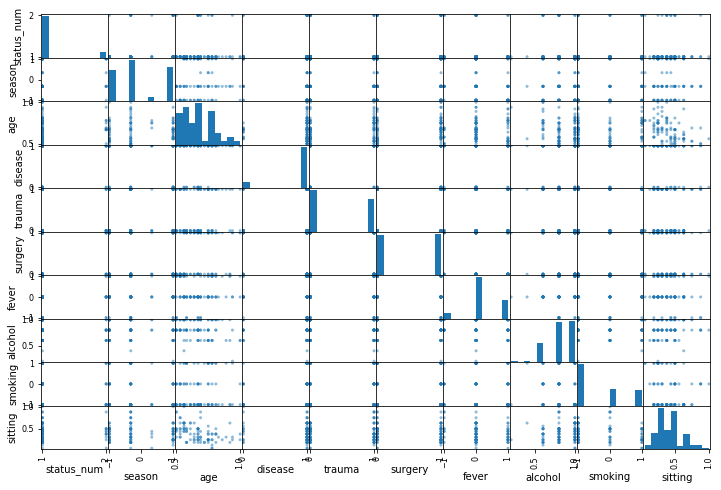

In [30]:
from pandas.tools.plotting import scatter_matrix
%matplotlib inline
import matplotlib.pyplot as plt
attributes = ["status_num", 'season', 'age', 'disease' ,'trauma', 'surgery', 'fever', 'alcohol', 'smoking', 'sitting']
scatter_matrix(fertility_df[attributes], figsize=(12, 8))

In [31]:
fertility_df.drop(['status'], axis=1, inplace=True)
fertility_df.shape

(100, 10)

In [32]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(fertility_df, test_size=0.25)
print(train_df.shape, test_df.shape)

((75, 10), (25, 10))


In [33]:
X_train = train_df.drop(['status_num'], axis=1)
y_train = train_df["status_num"]
X_test = test_df.drop(['status_num'], axis=1)
y_test = test_df["status_num"]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

((75, 9), (75,), (25, 9), (25,))


In [34]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)
sgd_clf

/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [35]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[60,  8],
       [ 6,  1]])

In [58]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12, ratio = 0.5)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
print(X_train_res.shape, y_train_res.shape)

((102, 9), (102,))


/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [39]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train_res, y_train_res)
sgd_clf

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [41]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train_res, y_train_res, cv=3)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_res, y_train_pred)

array([[60,  8],
       [45, 23]])

In [42]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train_res, y_train_res)
log_reg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(log_reg, X_train_res, y_train_res, cv=3)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_res, y_train_pred)

array([[53, 15],
       [ 0, 68]])

In [45]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train_res, y_train_res)
tree_clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [46]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(tree_clf, X_train_res, y_train_res, cv=3)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_res, y_train_pred)

array([[64,  4],
       [ 4, 64]])

In [59]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train_res, y_train_res)
forest_clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [60]:
y_train_pred = cross_val_predict(forest_clf, X_train_res, y_train_res, cv=3)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_res, y_train_pred)

array([[65,  3],
       [ 6, 28]])

In [50]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train_res, y_train_res)
svm_clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [51]:
y_train_pred = cross_val_predict(svm_clf, X_train_res, y_train_res, cv=3)
confusion_matrix(y_train_res, y_train_pred)

array([[53, 15],
       [ 0, 68]])

In [63]:
y_test_pred = log_reg.predict(X_test)
confusion_matrix(y_test, y_test_pred)

array([[19,  1],
       [ 4,  1]])